### 运行版本

In [1]:
import sys

sys.version

'3.8.13 (default, Mar 28 2022, 06:59:08) [MSC v.1916 64 bit (AMD64)]'

In [2]:
import tensorflow

tensorflow.__version__

'2.6.0'

In [3]:
import torch

torch.__version__

'1.10.1'

In [4]:
# !python -m deepxde.backend.set_default_backend tensorflow.compat.v1

In [5]:
import deepxde

deepxde.__version__

Using backend: tensorflow



'1.1.3'

# 3 热方程(Heat equation)

"热像引力一样穿透宇宙所有物质，辐射整个空间“。                                

​																									——傅立叶《热分析理论》1822


## 3.1 什么是热传导方程

热传导方程(heat equation)
$$
\large u_t - \Delta u = 0,  \tag{3.1}
$$
以及非齐次热传导方程
$$
\large u_t - \Delta u = f.  \tag{3.2}
$$
其中给定合适的初值与边界条件. 这里 $t>0,x\in U \subset \mathbb{R}^n$ 为开集. 不确定的东西是 $\large u:\bar{U} \times[0,\infty) \to \mathbb{R}, u = u(x,t)$，而Laplace算子是关于空间 $x=(x_1,\cdots,x_n)$ 的, 即 $\Delta u = \Delta_x u = \sum^n_{i=1} u_{x_i x_i}$ 在非齐次的方程中 $f:U\times[0,\infty) \to \mathbb{R}$ 是给定的.



## 3.2 基本解

**定义3.1 [热传导方程的基本解]** 定义函数
$$
\large
\Phi(x,t) \triangleq 
\begin{cases}
\begin{aligned}
&\frac{1}{(4\pi t)^{n/2}} e^{-\frac{|x|^2}{4t}}, & x \in \mathbb{R}^n, t > 0\\
&0, & x \in \mathbb{R}^n, t \leq 0\\
\end{aligned}
\end{cases}
\tag{3.3} \\
$$
为热传导方程的基本解。



## 3.3 齐次初值问题

下面用 $\Phi(x,t) $ 来解下面的初值(Cauchy)PDE:
$$
\large
\begin{cases}
\begin{aligned}
u_{t}-\Delta u &= 0, in \ \mathbb{R}^n \times (0,\infty) \\ 
u &= g, on \ \mathbb{R}^n \times \{t=0\}.  \\ 
\end{aligned}
\end{cases} 
\tag{3,4}
$$

仿照Laplace方程的过程, 如果我们作一个卷积
$$
\large
\begin{align}
u(x,t) &= \int_{\mathbb{R}^n} \Phi(x-y,t)g(y)dy\\
       &= \frac{1}{(4\pi t)^{n/2}} \int_{\mathbb{R}^n} e^{-\frac{|x-y|^2}{4t}}g(y)dy(x\in \mathbb{R}^n,t>0) \\
\tag{3.5}
\end{align}
$$
**定理1.2 [初值问题的解]** 设 $\large g \in C(\mathbb{R}^n) \cap L^{\infty}(\mathbb{R}^n)$，定义 $u$ 如式(3.5)，则

（1） $\large u\in C^{\infty}(\mathbb{R}^n \times (0,\infty))$，

（2）$\large u_t(x,t)-\Delta u(x,t) = 0, (x\in \mathbb{R}^n,t>0)$，

（3）$\large \lim_{(x,t)\to (x^0,0)} u(x,t) = g(x^0), \forall x^0 \in \mathbb{R}^n, 这里x\in \mathbb{R}^n, t>0$。

## 3.4 非齐次问题

下面考虑非齐次问题
$$
\large
\begin{cases}
\begin{aligned}
u_{t}-\Delta u &= f, in \ \mathbb{R}^n \times (0,\infty) \\ 
u &= 0, on \ \mathbb{R}^n \times \{t=0\}.  \\ 
\end{aligned}
\end{cases} 
\tag{3,6}
$$

$$
\large
\begin{align*}
u(x,t) &= \int^t_0 u(x,t;s)ds \\
       &= \int^t_0 \int_{\mathbb{R}^n} \Phi(x-y,t-s)f(y,s)dyds \\
       &= \int^t_0 \frac{1}{(4\pi (t-s))^{n/2}} \int_{\mathbb{R}^n} e^{-\frac{|x-y|^2}{4(t-s)}}f(y,s)dyds,\\
\tag{3.7}
\end{align*}
$$

**定理1.3 [非齐次问题的解]** 定义 $u$ 如式(3.7), 则

（1） $\large u\in C^2_1(\mathbb{R}^n \times (0,\infty))$，

（2）$\large u_t(x,t)-\Delta u(x,t) = f(x,t), (x\in \mathbb{R}^n,t>0)$，

（3）$\large \lim_{(x,t)\to (x^0,0)} u(x,t) = 0, \forall x^0 \in \mathbb{R}^n, 这里x\in \mathbb{R}^n, t>0$。



## 代码来源
https://github.com/lululxvi/deepxde/blob/master/examples/pinn_forward/heat_conduction_1d_uniform_bar.ipynb

在本代码中，我们将使用 DeepXDE 库中的 PINN 来求解热方程(heat equation)。

热方程的形式如下:
$$\large \frac{\partial u}{\partial t} = \alpha \nabla^2 u\;$$ .

其中 $\nabla^2$ 是拉普拉斯微分算子，$\alpha$ 是热扩散率常数，$u$ 是我们要近似的函数(温度)。

在一维情况下，我们有:$$\large \frac{\partial u(x, t)}{\partial t} = \alpha \frac{\partial^2u(x,t)}{{\partial x}^2}\;, \;\;\;\; x \in [0, 1]\;, \;\;\;\; t \in [0, 1]\;$$.

具有 Dirichlet 边界条件: $$\large u(0, t) = u(1, t) = 0\;$$ , 

和周期性(sinoidal)初始条件: $$\large u(x, 0) = sin(n\pi x/L)\;, \;\;\;\; 0 < x < L\;, \;\;\;\; n = 1, 2, ...\;.$$

这种设置是许多微分方程教科书中常见的问题，可以被物理解释为均匀一维杆中温度随时间的变化。在这里，常量 $\alpha$ 是热扩散率(棒的材料属性) ，$L$ 是棒的长度。

In [1]:
# Import libraries:
import matplotlib.pyplot as plt
import numpy as np

import deepxde as dde
from deepxde.backend import tf

Using backend: tensorflow



In [2]:
def heat_eq_exact_solution(x, t):
    """
    Returns the exact solution for a given x and t (for sinusoidal initial conditions).
    
    Parameters
    ----------
    x : np.ndarray
    t : np.ndarray
    """
    
    return np.exp(-(n**2*np.pi**2*a*t)/(L**2))*np.sin(n*np.pi*x/L)

def gen_exact_solution():
    """
    Generates exact solution for the heat equation for the given values of x and t.
    """
    
    # Number of points in each dimension:
    x_dim, t_dim = (256, 201)

    # Bounds of 'x' and 't':
    x_min, t_min = (0, 0.)
    x_max, t_max = (L, 1.)

    # Create tensors:
    t = np.linspace(t_min, t_max, num=t_dim).reshape(t_dim, 1)
    x = np.linspace(x_min, x_max, num=x_dim).reshape(x_dim, 1)
    usol = np.zeros((x_dim, t_dim)).reshape(x_dim, t_dim)

    # Obtain the value of the exact solution for each generated point:
    for i in range(x_dim):
        for j in range(t_dim):
            usol[i][j] = heat_eq_exact_solution(x[i],t[j])

    # Save solution:
    np.savez('heat_eq_data', x=x, t=t, usol=usol)
    data = np.load('heat_eq_data.npz')


def gen_testdata():
    """
    Import and preprocess the dataset with the exact solution.
    """
    
    # Load the data:
    data = np.load('heat_eq_data.npz')
    
    # Obtain the values for t, x, and the excat solution:
    t, x, exact = data["t"], data["x"], data["usol"].T
    
    # Process the data and flatten it out (like labels and features):
    xx, tt = np.meshgrid(x, t)
    X = np.vstack((np.ravel(xx), np.ravel(tt))).T
    y = exact.flatten()[:, None]
    
    return X, y

def main():

    def pde(x, y):
        """
        Expresses the PDE residual of the heat equation.        
        """
        dy_t = dde.grad.jacobian(y, x, i=0, j=1)
        dy_xx = dde.grad.hessian(y, x, i=0, j=0)
        return dy_t - a*dy_xx

    # Computational geometry:
    geom = dde.geometry.Interval(0, L)
    timedomain = dde.geometry.TimeDomain(0, 1)
    geomtime = dde.geometry.GeometryXTime(geom, timedomain)

    # Initial and boundary conditions:
    bc = dde.DirichletBC(geomtime, lambda x: 0, lambda _, on_boundary: on_boundary)
    ic = dde.IC(
        geomtime, lambda x: np.sin(n*np.pi*x[:, 0:1]/L), lambda _, on_initial: on_initial
        )

    # Define the PDE problem and configurations of the network:
    data = dde.data.TimePDE(
        geomtime, pde, [bc, ic], num_domain=2540, num_boundary=80, num_initial=160, num_test=2540
    )
    net = dde.nn.FNN([2] + [20] * 3 + [1], "tanh", "Glorot normal")
    model = dde.Model(data, net)

    # Build and train the model:
    model.compile("adam", lr=1e-3)
    model.train(epochs=20000)
    model.compile("L-BFGS")
    losshistory, train_state = model.train()

    # Plot/print the results
    dde.saveplot(losshistory, train_state, issave=True, isplot=True)
    X, y_true = gen_testdata()
    y_pred = model.predict(X)
    f = model.predict(X, operator=pde)
    print("Mean residual:", np.mean(np.absolute(f)))
    print("L2 relative error:", dde.metrics.l2_relative_error(y_true, y_pred))
    np.savetxt("test.dat", np.hstack((X, y_true, y_pred)))

G:\Anaconda3\envs\py3.8\lib\site-packages\skopt\sampler\sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
G:\Anaconda3\envs\py3.8\lib\site-packages\skopt\sampler\sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
G:\Anaconda3\envs\py3.8\lib\site-packages\skopt\sampler\sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "


Compiling model...
'compile' took 0.000367 s

Training model...

Cause: could not parse the source code of <function main.<locals>.<lambda> at 0x00000209D80B98B0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function main.<locals>.<lambda> at 0x00000209D80B98B0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function main.<locals>.<lambda> at 0x00000209D80B9AF0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function main.<locals>.<lambda> at 0x00000209D80B9AF0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Step      Train loss                        Test loss                      

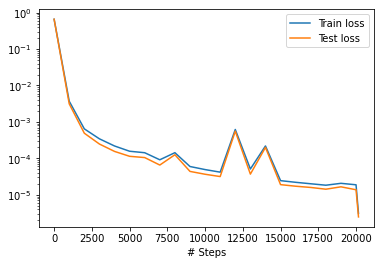

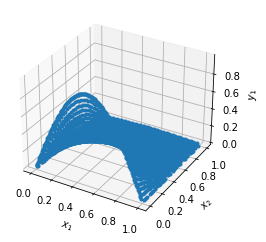

Mean residual: 0.0011916433
L2 relative error: 0.001267322116966461


In [3]:
if __name__ == "__main__":

    # Problem parameters:
    a = 0.4 # Thermal diffusivity
    L = 1 # Length of the bar
    n = 1 # Frequency of the sinusoidal initial conditions

    # Generate a dataset with the exact solution (if you dont have one):
    gen_exact_solution()

    # Solve the equation:
    main()